# Stacked Area Plot

In [1]:
%matplotlib inline
import sys

import pandas as pd
from tqdm import tqdm

sys.path.append("..")
from utils.config import (
    google_domains,
    cat2color
)

In [2]:
# variables
subsample = True
data_dir = '../data' if not subsample else '../data_subsample'
n_quantiles = 50

In [3]:
fn = f'{data_dir}/intermediary/element_metadata.jsonl.gz'
fn_out = f'{data_dir}/output/tables/area_plot.csv'
fn_plt = f'{data_dir}/output/figures/4-soup.png'

In [4]:
df = pd.read_json(fn, orient='records', 
                  lines=True, compression='gzip')

In [5]:
df.head(2)

,text,link,domain,xpath,category,tag,attrs,dimensions,location,area_page,...,q46_area,q47_area,q48_area,q49_area,q50_area,area_above_the_fold,label,category_standard,date_parsed,date_collected
0,AdAd·www.travelmediagroup.com/Hospitality Mark...,None,google.com,/html/body/div[10]/div/div[6]/div/div[1]/div[2...,ads-aria,div,"{'class': ['C4eCVc', 'c'], 'id': 'tads', 'aria...","{'height': 368.0, 'width': 347.0}","{'x': 8, 'y': 166}",127696.0,...,0.0,0.0,0.0,0.0,0.0,127696.0,ads,ads,2020-06-13,2019-11-21
1,Branded Strategic HospitalityNo reviewsCorpora...,None,google.com,/html/body/div[10]/div/div[6]/div/div[3]/div/d...,link-button,div,"{'class': ['Rouwme', 'iGyUPnC_7BKM-QjYh_nvGmIg...","{'height': 82.0, 'width': 347.0}","{'x': 8, 'y': 945}",28454.0,...,0.0,0.0,0.0,0.0,0.0,0.0,link,google-misc,2020-06-13,2019-11-21


Recall we cut each search result into 50 quantiles using the vertical distance.

In [6]:
area_cols = [f'q{i+1}_area' for i in range(0, n_quantiles)]

In [7]:
labels_in_order = [
    'ads',
    'link',
    'answer',
    'amp',
    'organic',
][::-1]

label2publabel = {
    'link' : 'Google Product',
    'answer' : 'Google Answer',
    'organic' : 'Organic',
    'amp' : 'AMP',
    'ads' : 'Ads'
}

label2label = {
    'organic' : 'Non-Google',
    'amp' : 'AMP',
    'answer' : 'Google Answer',
    'link' : 'Google Product',
    'ads' : "Ads",
}

In [8]:
n_pages = df.fn_input.nunique()

In [9]:
data = []
for q in tqdm(area_cols):
    _df = df[df[q] > 0]
    total_area = _df[q].sum()
    row = {'quantile' : q.replace('_area', '')}
    for label in labels_in_order:
        __df = _df[_df.label == label]
        area = (__df[q].sum() / total_area)
        freq = __df.fn_input.nunique() / n_pages
        row['area', label2publabel.get(label,label)] = area
        row['freq', label2publabel.get(label,label)] = freq
    data.append(row)

100%|██████████| 50/50 [00:00<00:00, 183.39it/s]


In [10]:
quantiles = pd.DataFrame(data)
quantiles.set_index('quantile', inplace=True)
quantiles.columns = pd.MultiIndex.from_tuples(quantiles.columns)

In [11]:
quantiles.loc[:,quantiles.columns.get_level_values(0) == 'area']

area                                                 
           Organic       AMP Google Answer Google Product       Ads
quantile                                                           
q1        0.194357  0.003946      0.085335       0.602994  0.113368
q2        0.166013  0.054642      0.107274       0.580415  0.091656
q3        0.154081  0.164649      0.149886       0.447989  0.083395
q4        0.172171  0.187047      0.346454       0.222545  0.071782
q5        0.186035  0.188148      0.400082       0.187373  0.038364
q6        0.228340  0.122937      0.382815       0.230544  0.035364
q7        0.275636  0.071823      0.283594       0.342175  0.026773
q8        0.321621  0.047101      0.218558       0.395187  0.017533
q9        0.328110  0.053032      0.195498       0.415731  0.007629
q10       0.368628  0.071600      0.204906       0.344894  0.009972
q11       0.376474  0.081902      0.229130       0.309123  0.003371
q12       0.418811  0.082498      0.213188       0.284329  0.001174
q13       0.425123  0.108080      0.199935       0.266861  0.000000
q14       0.460156  0.119274      0.191647       0.228923  0.000000
q15       0.536493  0.111456      0.159620       0.192432  0.000000
q16       0.600845  0.104377      0.088988       0.205790  0.000000
q17       0.582943  0.108665      0.090549       0.217844  0.000000
q18       0.574634  0.105951      0.095400       0.224016  0.000000
q19       0.556369  0.109845      0.105327       0.228460  0.000000
q20       0.571427  0.120897      0.101786       0.205891  0.000000
q21       0.540230  0.145113      0.104313       0.210343  0.000000
q22       0.509474  0.136251      0.120972       0.233303  0.000000
q23       0.501335  0.121179      0.121883       0.255603  0.000000
q24       0.492391  0.103198      0.135561       0.268850  0.000000
q25       0.474951  0.108549      0.151295       0.265205  0.000000
q26       0.474904  0.113702      0.154863       0.256531  0.000000
q27       0.505868  0.103869      0.141737       0.248525  0.000000
q28       0.552513  0.095174      0.122754       0.229559  0.000000
q29       0.565219  0.124482      0.108904       0.201395  0.000000
q30       0.617769  0.122886      0.088850       0.170495  0.000000
q31       0.662750  0.140043      0.073107       0.124100  0.000000
q32       0.671160  0.176541      0.048675       0.103624  0.000000
q33       0.670372  0.193812      0.043044       0.092772  0.000000
q34       0.689577  0.211582      0.026734       0.072107  0.000000
q35       0.721132  0.208971      0.020560       0.049337  0.000000
q36       0.740694  0.194710      0.025192       0.039405  0.000000
q37       0.764191  0.186813      0.017612       0.031385  0.000000
q38       0.727212  0.226235      0.011215       0.035338  0.000000
q39       0.690930  0.255109      0.018763       0.033865  0.001334
q40       0.686874  0.247022      0.021107       0.042252  0.002743
q41       0.649197  0.235304      0.034162       0.076134  0.005203
q42       0.618797  0.212781      0.043678       0.119806  0.004939
q43       0.595654  0.183816      0.063153       0.151171  0.006206
q44       0.415719  0.108055      0.106709       0.360092  0.009424
q45       0.208769  0.066564      0.183720       0.536387  0.004561
q46       0.081023  0.022363      0.433009       0.459004  0.004602
q47       0.020713  0.005829      0.415052       0.558407  0.000000
q48       0.008431  0.003978      0.229740       0.757852  0.000000
q49       0.008059  0.002463      0.094917       0.894560  0.000000
q50       0.001345  0.000857      0.026642       0.971157  0.000000

In [12]:
cuts = quantiles.loc[:,quantiles.columns.get_level_values(0) == 'area']

In [13]:
cuts.columns = cuts.columns.droplevel()

In [14]:
cuts.to_csv(fn_out)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label=label2label.get(label),
                          markerfacecolor=c, markersize=10)
                   for label, c in cat2color.items()][::-1]

In [17]:
colors = [cat2color.get(c) for c in labels_in_order]

In [18]:
page_section = [i / n_quantiles for i in range(len(cuts.index))]

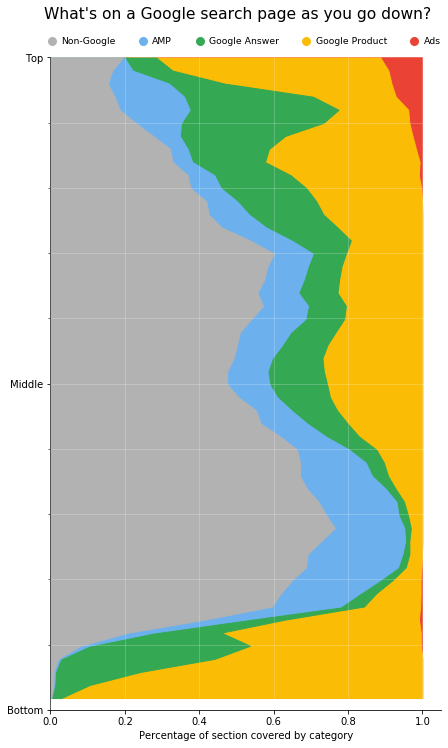

In [19]:
ig, ax = plt.subplots(figsize=(7, 12))

data = np.cumsum(cuts.values, axis=1)
for i, col in enumerate(cuts.columns):
    ax.fill_betweenx(page_section, 
                     data[:, i], 
                     label=col[-1], 
                     color=colors[i],
                     zorder=-i)
ax.margins(y=0)
ax.set_xlim(0, None)
ax.set_axisbelow(False)
plt.gca().invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# special ticks for y-axis
ax.set_yticks(np.arange(0, 1.001, 0.0998), minor=True)
plt.yticks(np.arange(0, 1.001, .499),
           ['Top', 'Middle', 'Bottom'])

ax.legend(handles=legend_elements[::-1],
          loc='lower left', 
          bbox_to_anchor= (-0.025, 1.015), ncol=5,
          handletextpad=0.0,
          labelspacing=0, 
          borderaxespad=.1, 
          borderpad=0.1,
          frameon=False,
          prop={'size': 9.2}
         )

plt.title("What's on a Google search page as you go down?",
         x=0.48,
         y=1.05,
         size=15.5)

ax.set_xlabel("Percentage of section covered by category")

ax.grid(which='major', 
        axis='x', 
        linestyle='-',
        alpha=.27,
        zorder=1000, 
        color='white')

ax.grid(which='both', 
        axis='y', 
        linestyle='-',
        alpha=.27,
        zorder=1000, 
        color='white')

plt.savefig(fn_plt)
plt.show();